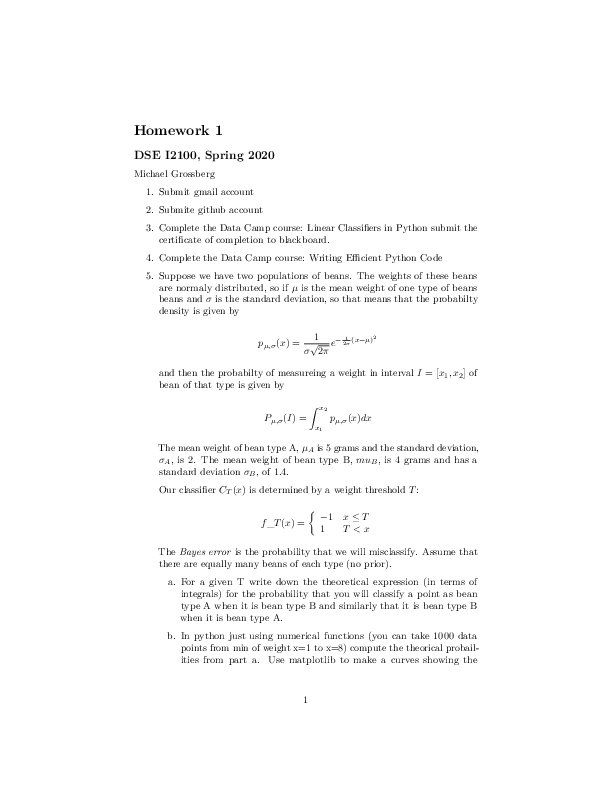

In [19]:
import wand
from wand.image import Image as WImage
image = WImage(filename='hw1.pdf')
image

In [80]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [81]:
mu_A = 5 #grams
sig_A = 2 #unit

mu_B = 4 #grams
sig_B = 1.4 #unit

In [82]:
def threshold(x,T):
    if x <= T:
        return -1
    return 1

# #5 Bayes Theorem– 
## Conditional Probability

# $$P(Y|X) = \frac{P(X|Y) * P(Y)}{P(X)}$$

# $$Posterior = \frac{Likelihood * Prior}{Evidence}$$

# #5a Bayes Error – 
## The probability we'll misclassify
# $$1- \Sigma_{C_i  ≠ C_{max, x}} \int \limits_{x ∈ H_i} [P(C_i|x)* p(x)]\ dx $$

https://en.wikipedia.org/wiki/Bayes_error_rate

In [86]:
xA = np.arange(mu_A*-3.5*sig_A,mu_A*3.5*sig_A,0.001)
xB = np.arange(mu_B*-3.5*sig_B,mu_B*3.5*sig_B,0.001)

In [99]:
yA = (np.e**(-(xA-mu_A)**2))/(np.pi*2*sig_A)**.5
yB = (np.e**(-(xB-mu_B)**2))/(np.pi*2*sig_B)**.5

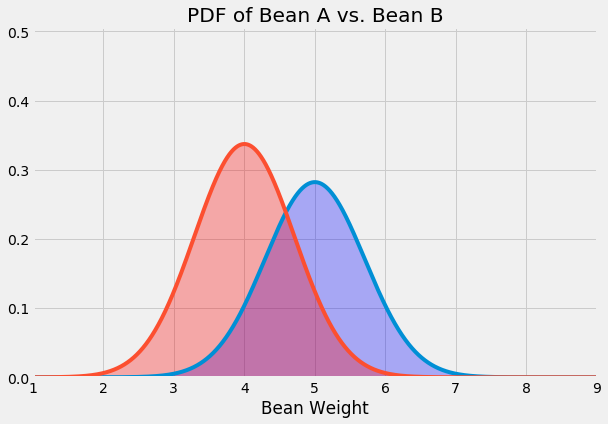

In [191]:
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(xA,yA)

ax.fill_between(xA,yA,0, alpha=0.3, color='b')
#ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlim([-4+mu_A,4+mu_A])
ax.set_xlabel('Bean Weight')
ax.set_ylim(ymin=0,ymax=1.5*max(max(yA),max(yB)))
ax.set_title('PDF of Bean A vs. Bean B')

ax.plot(xB,yB)
ax.fill_between(xB,yB,0, alpha=0.3, color='r')

#plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()

In [151]:
np.array((max(yA)))

array(0.28209479)

In [167]:
np.array((max(yB)))

array(0.33716777)

In [168]:
max(max(yA),max(yB))

0.3371677656723677

In [211]:
def normFunc(x,mu,sig):
    return (np.e**(-(x-mu)**2))/(np.pi*2*sig)**.5

typeII_domain = np.arange(1,8,.001)
misClassify_A = normFunc(typeII_domain,mu_B,sig_B)
misClassify_B = normFunc(typeII_domain,mu_A,sig_A)

cumsum = sum(.001*np.minimum(misClassify_B,misClassify_A))

print(cumsum)

0.2612446252862569


In [207]:
np.minimum(normFunc(typeII_domain,mu_A,sig_A),normFunc(typeII_domain,mu_B,sig_B))

array([3.17455867e-08, 3.20005379e-08, 3.22574722e-08, ...,
       3.88645368e-08, 3.85550537e-08, 3.82479585e-08])

In [208]:
np.minimum(normFunc(typeII_domain,mu_A,sig_A),normFunc(typeII_domain,mu_B,sig_B))[500]

1.3498566943456763e-06

In [209]:
typeII_domain

array([1.   , 1.001, 1.002, ..., 7.997, 7.998, 7.999])

## The probability we'll misclassify
# ~26.1%